In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis"
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
load("environment/Chimp/mapDf.RData")
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "yAggConsNS.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "yAggCorNS.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "yAggConsNS0.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "yAggMeanInfNS0.RData"))
load(file.path(dir, "treeThr.RData"))
load(file.path(dir, "yAggThrNS.RData"))
suppressPackageStartupMessages(source("brain_simulation_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/tree_analysis/tree_filter.R"))

In [12]:
dfInf <- data.frame(matrix(nrow=0, ncol=4))
colnames(dfInf) <- c("Type", "Value", "nCuts", "gamma")

l <- length(treeCons$tip)
trees <- list(treeCons, treeCons0, treeMeanInf0, treeCor, treeThr)
names(trees) <- c("ConsInd", "Cons", "Mean", "AC", "ConsRedInd")
yAgg <- list(yAggConsNS, yAggConsNS0, yAggMeanInfNS0, yAggCorNS, yAggThrNS)
names(yAgg) <- c("ConsInd", "Cons", "Mean", "AC", "ConsRedInd")
gammas <- c(0.1,0.5,1,5,10)
dCutsDInf <- vector(mode = "list", length=length(gammas))

names(dCutsDInf) <- paste("gamma=", gammas, sep="")
for(j in seq_along(dCutsDInf)) {
    gamma <- gammas[j]
    dCutsDInf[[j]] <- vector(mode="list", length(yAgg)+1)
    names(dCutsDInf[[j]]) <- c(names(yAgg), "Txps")
    for(i in seq(yAgg)) {
        globArr <- rep(-100, l+trees[[i]]$Nnode)
        descL <- sapply(Descendants(trees[[i]], seq(l+trees[[i]]$Nnode)), length)
        
        infReps <- assays(yAgg[[i]])[grep("infRep", assayNames(yAgg[[i]]))]
        infReps <- abind::abind(as.list(infReps), along = 3)
        obj <- mcols(yAgg[[i]])[["meanInfRV"]] + gamma*node.depth(trees[[i]],2)
        val <- findOptSum(trees[[i]], obj, l+1, descL)

        gc()
        dCutsDInf[[j]][[i]] <- findCuts(trees[[i]], globArr, obj, l+1, descL)
        gc()
        dfInf <- rbind(dfInf, data.frame(Type = names(trees)[i], Value = val,
               nCuts = length(dCutsDInf[[j]][[i]]), gamma=gamma))
    }
    i <- length(yAgg)+1
    dCutsDInf[[j]][[i]] <- 1:l
    names(dCutsDInf[[j]])[i] <- "Txps"
    dfInf <- rbind(dfInf, data.frame(Type = "Txps", Value = sum(obj[1:l]),
               nCuts = length(dCutsDInf[[j]][[i]]), gamma=gamma))
}
print(dfInf)
save(dfInf, file=file.path(dir, "dfInf.RData"))
save(dCutsDInf, file=file.path(dir, "dCutsDInf.RData"))

         Type     Value nCuts gamma
1     ConsInd  15637.91 25470   0.1
2        Cons  15828.01 25800   0.1
3        Mean  15890.42 25836   0.1
4          AC  29087.02 26488   0.1
5  ConsRedInd  40503.04 36799   0.1
6        Txps 215540.91 45375   0.1
7     ConsInd  57785.52 31097   0.5
8        Cons  57892.72 31195   0.5
9        Mean  57988.46 31219   0.5
10         AC  66824.81 31385   0.5
11 ConsRedInd  69159.26 37044   0.5
12       Txps 233690.91 45375   0.5
13    ConsInd 100365.37 34445   1.0
14       Cons 100417.33 34440   1.0
15       Mean 100525.01 34461   1.0
16         AC 107280.27 34485   1.0
17 ConsRedInd 104401.29 37341   1.0
18       Txps 256378.41 45375   1.0
19    ConsInd 348009.88 41520   5.0
20       Cons 348055.30 41521   5.0
21       Mean 348058.35 41529   5.0
22         AC 351919.53 41608   5.0
23 ConsRedInd 347650.82 41459   5.0
24       Txps 437878.41 45375   5.0
25    ConsInd 606276.83 43412  10.0
26       Cons 606280.77 43414  10.0
27       Mean 606290.92 4340

In [21]:
load(file.path(dir, "dfInf.RData"))
load(file.path(dir, "dCutsDInf.RData"))
load(file.path(dir, "dCutsSLFC.RData"))

In [66]:
l <- length(treeCons$tip)
trees <- list(treeCons, treeCons0, treeMeanInf0, treeCor, treeThr)
names(trees) <- c("ConsInd", "Cons", "Mean", "AC", "ConsRedInd")
yAgg <- list(yAggConsNS, yAggConsNS0, yAggMeanInfNS0, yAggCorNS, yAggThrNS)
names(yAgg) <- c("ConsInd", "Cons", "Mean", "AC", "ConsRedInd")
gammas <- c(0.1,0.5,1,5,10)
objsLFC <- vector(mode="list", length(yAgg))
names(objsLFC) <- names(yAgg)
objsDepth <- vector(mode="list", length(yAgg))
names(objsDepth) <- names(yAgg)
for(i in seq_along(yAgg)) {
    descL <- sapply(Descendants(trees[[i]],seq(l+trees[[i]]$Nnode)),length)
    objsDepth[[i]] <- (mcols(yAgg[[i]])[["meanInfRV"]] + 0.1*node.depth(trees[[i]],2))*descL
    infReps <- assays(yAgg[[i]])[grep("infRep", assayNames(yAgg[[i]]))]
    infReps <- abind::abind(as.list(infReps), along = 3)
    mSf <- 0
    for(j in seq(dim(infReps)[3])) {
            sf <- colSums(infReps[1:l,,j])
            mSf <- mean(sf) + mSf
            infReps[,,j] <- t(t(infReps[,,j])/sf)
    }
    mSf <- mSf/dim(infReps)[3]
    print(mSf)
    lfc <- getLog2FC(infReps, colData(yAgg[[i]])[["condition"]], pc = 5/mSf)
    objsLFC[[i]] <- descL*abs(lfc)/mcols(yAgg[[i]])[["meanInfRV"]]
}

[1] 15566606
[1] 15566606
[1] 15566606
[1] 15566606
[1] 15566606


In [70]:
sum(objsLFC[[i]][dCutsSLFC[[i]]])

[1] 2433283

In [71]:
length(dCutsSLFC[[i]])

[1] 42366

In [103]:
suppressPackageStartupMessages(source("old_terminus_helper.R"))
i <- 6
infReps <- assays(yAggTermThrNS)[grep("infRep", assayNames(yAggTermThrNS))]
infReps <- abind::abind(as.list(infReps), along = 3)

term_dir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
groupsClust <- parseClustFile(file.path(term_dir, "old", "PTB162LA1C", "clusters.txt"), yAggTermThrNS, gsub=T)
mtxps <- setdiff(seq(l), unlist(groupsClust))

mSf <- 0
for(j in seq(dim(infReps)[3])) {
            sf <- colSums(infReps[1:l,,j])
            mSf <- mean(sf) + mSf
            infReps[,,j] <- t(t(infReps[,,j])/sf)
    }
mSf <- mSf/dim(infReps)[3]
descL <- c(rep(1, l), sapply(groupsClust, length))

lfc <- getLog2FC(infReps, colData(yAggTermThrNS)[["condition"]], pc = 5/mSf)
objsLFC[[i]] <- descL*abs(lfc)/mcols(yAggTermThrNS)[["meanInfRV"]]
names(objsLFC)[i] <- "Term"

#### Depth

In [4]:
for(i in seq(trees)){
    print(names(trees)[i])
    print(table(node.depth(trees[[i]],2)[dCutsDInf[[1]][[i]]]))
}
    

[1] "ConsInd"

    1     2     3     4     5     6     7     8     9    10    11    12    13 
16097  4347  2659  1294   576   264   127    50    32    20     1     2     1 
[1] "Cons"

    1     2     3     4     5     6     7     8     9    10    11    13    14 
16389  4437  2551  1296   575   280   149    59    34    25     2     2     1 
[1] "Mean"

    1     2     3     4     5     6     7     8     9    10    11    12    13 
16423  4451  2542  1306   553   281   143    66    41    23     2     1     2 
   14 
    2 
[1] "AC"

    1     2     3     4     5     6     7     8     9 
16949  4894  3051  1185   317    80    10     1     1 
[1] "ConsRedInd"

    1     2     3     4     5     6     7     8     9    10 
31793  3143  1167   471   151    50    14     7     1     2 


In [10]:
i <- 1
dfDepth <- data.frame(depthObj = objsDepth[[i]][dCutsDInf[[1]][[i]]], type=names(objsDepth)[i])
for(i in seq(2,5)) {
    dfDepth <- rbind(dfDepth, data.frame(depthObj = objsDepth[[i]][dCutsDInf[[1]][[i]]], type=names(objsDepth)[i]))
}
dfDepth <- rbind(dfDepth, data.frame(depthObj = objsDepth[[i]][1:l], type="Txps"))

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"


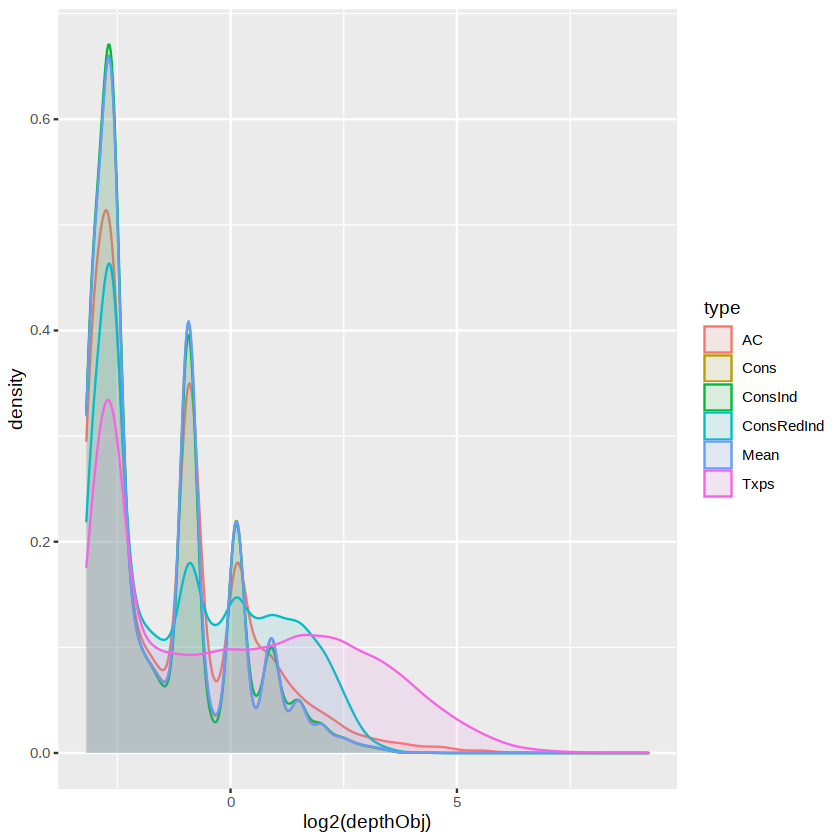

In [13]:
ggplot(dfDepth, aes(x=log2(depthObj), fill = type, colour = type)) + 
    geom_density(position = "dodge", alpha=0.1)

#### LFC

In [105]:
for(i in seq(trees)){
    print(names(trees)[i])
    print(table(node.depth(trees[[i]],2)[dCutsSLFC[[i]]]))
}
i <- 1
dfLFC <- data.frame(LFC = objsLFC[[i]][dCutsSLFC[[i]]], type=names(objsLFC)[i])
for(i in seq(2,6)) {
    dfLFC <- rbind(dfLFC, data.frame(LFC = objsLFC[[i]][dCutsSLFC[[i]]], type=names(objsLFC)[i]))
}
i <- 7
dfLFC <- rbind(dfLFC, data.frame(LFC = objsLFC[[i-1]][1:l], type="Txps"))

[1] "ConsInd"

   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
8256 4744 3145 1667  843  403  163  107   43   37    5    2    3    1 
[1] "Cons"

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6873 4799 3089 1633  886  525  243  128   94   54    7    5    2    3    2 
[1] "Mean"

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
6524 4911 3090 1661  879  499  238  150   87   66   13    8    3    4    1    1 
  17   20 
   2    1 
[1] "AC"

    1     2     3     4     5     6     7     8     9    10    13 
12347  2749  2175  1263   585   253    87    29    16     3     1 
[1] "ConsRedInd"

    1     2     3     4     5     6     7     8     9    10    14 
30009  3730  1264   513   165    54    15     8     1     2     1 


Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"


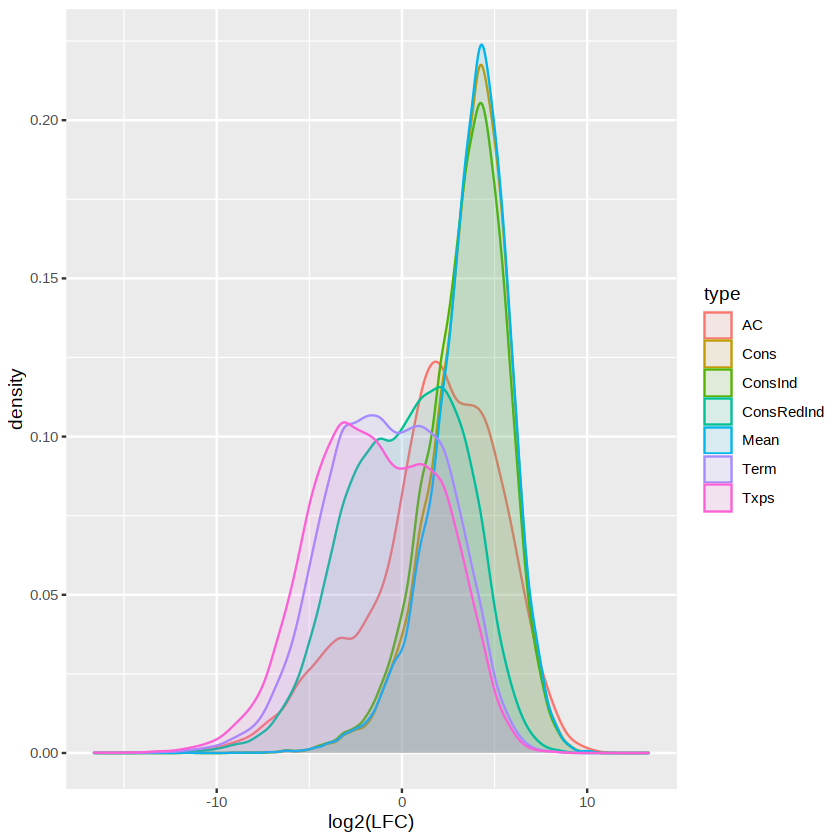

In [106]:
ggplot(dfLFC, aes(x=log2(LFC), fill = type, colour = type)) + 
    geom_density(position = "dodge", alpha=0.1)